[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/LogisticRegression_on_iris_dataset.ipynb)

In [16]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
iris = datasets.load_iris()

dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [17]:

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
np.unique(iris.target)

array([0, 1, 2])

In [0]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

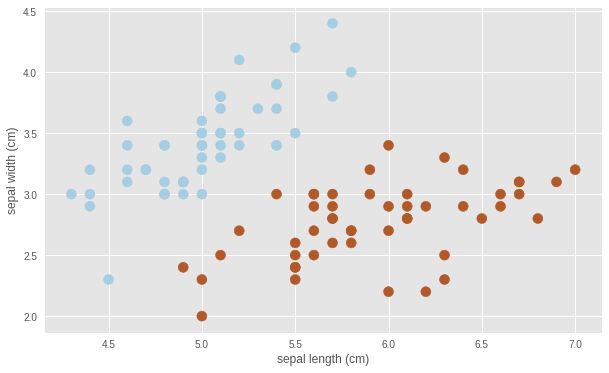

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.1, random_state=42
)

In [22]:
lr = cv2.ml.LogisticRegression_create()
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

lr.setIterations(100)

lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [23]:

lr.get_learnt_thetas()

array([[-0.04109113, -0.01968079, -0.16216496,  0.2870491 ,  0.1194552 ]],
      dtype=float32)

In [24]:
ret, y_pred = lr.predict(X_train)
metrics.accuracy_score(y_train, y_pred)

1.0

In [25]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [26]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -2.,  2.],
              [ 3.,  0.,  0.],
              [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.26726124, -1.33630621,  1.33630621],
       [ 1.33630621,  0.26726124, -0.26726124],
       [-1.06904497,  1.06904497, -1.06904497]])

In [27]:
X_scaled.mean(axis=0)

array([7.40148683e-17, 0.00000000e+00, 0.00000000e+00])

In [28]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [29]:
X_normalized_l1 = preprocessing.normalize(X, norm='l1')
X_normalized_l1

array([[ 0.2, -0.4,  0.4],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.5, -0.5]])

In [30]:
X_normalized_l2 = preprocessing.normalize(X, norm='l2')
X_normalized_l2

array([[ 0.33333333, -0.66666667,  0.66666667],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [31]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-10, 10))
X_min_max2 = min_max_scaler.fit_transform(X)
X_min_max2

array([[ -3.33333333, -10.        ,  10.        ],
       [ 10.        ,   3.33333333,  -3.33333333],
       [-10.        ,  10.        , -10.        ]])

In [32]:
X

array([[ 1., -2.,  2.],
       [ 3.,  0.,  0.],
       [ 0.,  1., -1.]])

In [33]:
binarizer = preprocessing.Binarizer(threshold=0.5)
X_binarized = binarizer.transform(X)
X_binarized

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [0]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 2,   9,  -8  ],
              [ 1,   nan, 1  ],
              [ 5,   2,   4  ],
              [ 7,   6,  -3  ]])

In [35]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 3.75,  0.  ,  3.  ],
       [ 2.  ,  9.  , -8.  ],
       [ 1.  ,  4.25,  1.  ],
       [ 5.  ,  2.  ,  4.  ],
       [ 7.  ,  6.  , -3.  ]])

In [37]:
np.mean(X[1:, 0]), X2[0, 0]

(3.75, 3.75)

In [38]:
imp = Imputer(strategy='median')
X3 = imp.fit_transform(X)
X3

array([[ 3.5,  0. ,  3. ],
       [ 2. ,  9. , -8. ],
       [ 1. ,  4. ,  1. ],
       [ 5. ,  2. ,  4. ],
       [ 7. ,  6. , -3. ]])

In [39]:

np.median(X[1:, 0]), X3[0, 0]

(3.5, 3.5)